<a href="https://colab.research.google.com/github/omkart0124/Exploratory-Data-Analysis/blob/main/Bank_Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Churn prediction is one of the most popular Big Data use cases in business. It consists of detecting customers who are likely to cancel a subscription to a service. So this dataset is on banks customer churn.

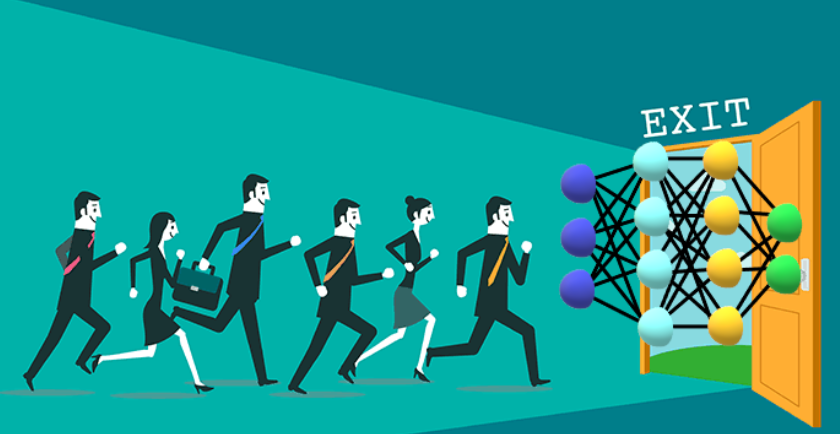

##Features:
RowNumber - the index of the row in the data

CustomerId - unique customer identifier

Surname - surname

CreditScore - credit rating

Geography - country of residence

Gender - gender

Age - age

Tenure - how many years a person has been a client of the bank

Balance - account balance

NumOfProducts - the number of bank products used by the client

HasCrCard - availability of a credit card

IsActiveMember - client activity

EstimatedSalary - estimated salary

#Target column:

Exited - the fact of the client's departure

##Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score  # because we are working with binary classification we use roc.. roc auc utilize only for binary classification.

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
# Dropping unnecessary columns

df.drop(["RowNumber","CustomerId","Surname"],axis= "columns", inplace= True)
df.shape

(10000, 11)

In [ ]:
df.isnull().sum()           # No null values in the data

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
for col in df:
  print(df[col].unique())             # checking unique values of all columns

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 560 752 701 53

###One-hot Encoding
The categorical features geography and gender must be converted to numerical ones using One-Hot Encoding. We need quantitative features to be more accurate

In [ ]:
df['Geography'].value_counts()  

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
gender = pd.get_dummies(df["Geography"], drop_first=True)
country = pd.get_dummies(df["Gender"], drop_first=True)

In [ ]:
# delete extra features
df.drop(["Geography", "Gender"], axis=1, inplace=True)

In [ ]:
df1 = pd.concat([df, gender, country], axis=1)

In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df1.shape

(10000, 12)

##Train_Test_Split

In [ ]:
x = df1.drop('Exited', axis='columns')      # created x and y variables
y = df1['Exited']

In [ ]:
ss = StandardScaler()
x = ss.fit_transform(x)         # scalling

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [ ]:
x.shape

(10000, 11)

In [ ]:
x_train.shape

(7000, 11)

Creating Neural Network

In [ ]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(11, activation="relu", input_shape=(x.shape[1],)),#---------------1st layer the number 11 denotes number of neurons
     tf.keras.layers.Dense(15, activation="relu"),#--------------------2nd layer 15neurons--Hidden layers
     tf.keras.layers.Dense(1, activation="sigmoid")]#-------------output layer
)

In [ ]:
model.summary ()        # params : input parameter along with bias.

# 11(Features)*11Neurons+11(bias)=132
# 11(1st layer neurons) *15(2nd layer ) + 15(bias form 2nd layer)=180

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 328
Trainable params: 328
Non-trainable params: 0
_________________________________________________________________


##now we have to compile the model

In [ ]:
model.compile(optimizer= 'adam', loss="binary_crossentropy")

In [ ]:
trained_model = model.fit(x_train, y_train, epochs=250, batch_size=25)

# epochs how many iterration you want to take to calculte weight

Epoch 1/250
280/280 [==============================] - 1s 2ms/step - loss: 0.4956
Epoch 2/250
280/280 [==============================] - 0s 1ms/step - loss: 0.4456
Epoch 3/250
280/280 [==============================] - 0s 1ms/step - loss: 0.4292
Epoch 4/250
280/280 [==============================] - 0s 1ms/step - loss: 0.4211
Epoch 5/250
280/280 [==============================] - 0s 1ms/step - loss: 0.4128
Epoch 6/250
280/280 [==============================] - 0s 1ms/step - loss: 0.4061
Epoch 7/250
280/280 [==============================] - 0s 1ms/step - loss: 0.3972
Epoch 8/250
280/280 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 9/250
280/280 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 10/250
280/280 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 11/250
280/280 [==============================] - 0s 1ms/step - loss: 0.3615
Epoch 12/250
280/280 [==============================] - 0s 1ms/step - loss: 0.3560
Epoch 13/250


In [ ]:
y_hat = model.predict(x_test)
y_hat

# we are using sigmoid thats why its return probability value
# but the model expectation 0 and 1

array([[0.9332254 ],
       [0.04317668],
       [0.30677402],
       ...,
       [0.0080944 ],
       [0.01695472],
       [0.10013285]], dtype=float32)

In [ ]:
y_hat1 = np.where(y_hat >= 0.5, 1, 0)

# for output 0 and 1 we set threashold to 0.5 and we use where fuction
# condition is if y_hat is greater that 0.5 return 1 otherwise 0

In [ ]:
y_hat1.flatten()    # returns 1D array 

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
roc_auc_score(y_test, y_hat1)

0.7169956545240426

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

In [ ]:
print(classification_report(y_test, y_hat1)) 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.74      0.48      0.58       611

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [ ]:
print(accuracy_score(y_test, y_hat1))

0.8596666666666667


In [ ]:
y_test

3898    1
9261    0
3440    1
631     1
9206    1
       ..
5814    0
1118    0
531     0
5090    0
1770    1
Name: Exited, Length: 3000, dtype: int64